In [ ]:
import numpy as np
import random, math
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from matplotlib import animation,rc


In [56]:
#generate data
np.random.seed(100)
classA = np.concatenate((np.random.randn(10, 2)*0.2 + [1.5, 0.5],np.random.randn(10, 2)*0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2)*0.2 + [0.0 , -0.5]
inputs = np.concatenate ((classA,classB ))
targets = np.concatenate ((np.ones(classA.shape[0]),-1*(np.ones(classB.shape[0]))))
N = inputs.shape[0]
permute=list(range(N))
random.shuffle(permute)
inputs = inputs[ permute , : ]
targets = targets[ permute ]

def kernel(x, y,kernel_trick, z=0):
    if kernel_trick == 'linear':
        return linear_kernel(x, y, z)
    elif kernel_trick == 'poly':
        return poly_kernel(x, y, z)
    elif kernel_trick == 'RBF':
        return RBF_kernel(x, y, z)

def linear_kernel(x,y,z):
    return np.dot(np.transpose(x),y)
def poly_kernel(x,y,p):
    return (np.dot(np.transpose(x),y)+1)**p
def RBF_kernel(x,y,s):
    temp1=np.dot(np.subtract(x,y),np.subtract(x,y))
    temp2=2*(s**2)
    return math.exp(-1*(temp1/temp2))

def gen_P(data,targets,kernel1, z):
    p=np.zeros([len(data)]*2)
    for i in range(len(data)):
#         p[i,:]=[targets[i]*targets[j]*linear_kernel([data[i][0],data[i][1]],[data[j][0],data[j][1]]) for j in range(len(data))]
#         p[i,:]=[targets[i]*targets[j]*RBF_kernel([data[i][0],data[i][1]],[data[j][0],data[j][1]],mbut) for j in range(len(data))]
#         p[i,:]=[targets[i]*targets[j]*poly_kernel([data[i][0],data[i][1]],[data[j][0],data[j][1]],mbut) for j in range(len(data))]
        p[i,:]=[targets[i]*targets[j]*kernel([data[i][0],data[i][1]],[data[j][0],data[j][1]],kernel1,z) for j in range(len(data))]
    return p

def obj(a):
    temp1=np.zeros(len(inputs))
    for i in range(len(P)):
        temp1[i]=np.sum([a[i]*a[j]*P[i][j] for j in range(len(P))])
    temp1=np.sum(temp1)
    temp2=np.sum(a)
    return (temp1/2)-temp2

def zerofun(a,data=targets):
    return np.sum([a[i]*targets[i] for i in range(len(a))])

def indicator(x,y,kernel1,z):
#     return np.sum([a1[i]*targets1[i]*linear_kernel([x,y],[inputs1[i][0],inputs1[i][1]]) for i in range(len(a1))])
#     return np.sum([a1[i]*targets1[i]*poly_kernel([x,y],[inputs1[i][0],inputs1[i][1]],mbut) for i in range(len(a1))])
    return np.sum([a1[i]*targets1[i]*kernel([x,y],[inputs1[i][0],inputs1[i][1]],kernel1,z)+0.05 for i in range(len(a1))])

True
True
True
True
True


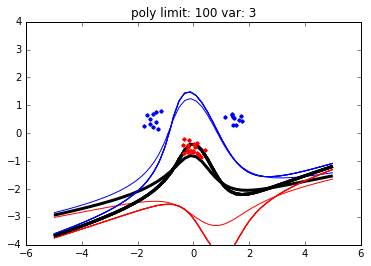

In [60]:
mbut=3
limits=[None,0.1,1,10,100]
ker='poly'
fig=[311,321,331]

for haha in range(len(limits)):
    limit=limits[haha]
    P=gen_P(inputs,targets, ker ,mbut)


    #Constraint and Boundaries
    B=[(0, limit) for b in range(N)]
    XC={'type':'eq', 'fun':zerofun}

    #minimization
    ret = minimize(obj, np.zeros(N), bounds=B, constraints=XC )
    a = ret['x']

    print(ret['success'])

    #filter
    a1=a[a>10e-5]
    inputs1=inputs[a>10e-5]
    targets1=targets[a>10e-5]

    #draw
#     plt.figure(haha+1)
#     plt.subplot(fig[haha])
    xgrid=np.linspace(-5, 5)
    ygrid=np.linspace(-4, 4)
    plt.plot([p[0] for p in classA],[p[1] for p in classA],'b.')
    plt.plot([p[0] for p in classB],[p[1] for p in classB],'r.')
    plt.title(ker+' limit: '+str(limit)+' var: '+str(mbut))
    plt.axis('equal')
    grid=np.array([[indicator(x, y,ker,mbut) for x in xgrid ] for y in ygrid])
    plt.contour(xgrid , ygrid , grid , (-1.0, 0.0, 1.0),colors=('r', 'k', 'b'), linewidths=(1, 3, 1))
#     plt.savefig('figures/'+ker+' limit: '+str(limit)+' var: '+str(mbut)+'.png')
#     plt.show()

In [94]:
import numpy as np
import random, math
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from matplotlib import animation,rc
#generate data
np.random.seed(100)
classA = np.concatenate((np.random.randn(10, 2)*0.2 + [1.5, 0.5],np.random.randn(10, 2)*0.2 + [-1.5, 0.5]))

classB = np.random.randn(20, 2)*0.2 + [0.0 , -0.5]
inputs = np.concatenate ((classA,classB ))
targets = np.concatenate ((np.ones(classA.shape[0]),-1*(np.ones(classB.shape[0]))))
N = inputs.shape[0]
permute=list(range(N))
random.shuffle(permute)
inputs = inputs[ permute , : ]
targets = targets[ permute ]

-1.83741910575e-14
-1.83741910575e-14
-1.92346139016e-14
-2.22044604925e-16
-3.77475828373e-14
-1.65423230669e-14
-3.99680288865e-15
9.7084963587e-17
-1.83741910575e-14


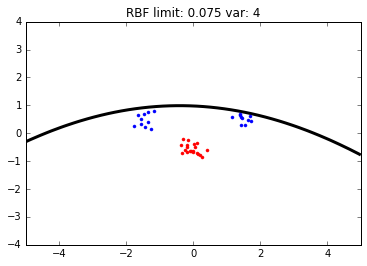

In [97]:
limits=[0.075,0.1,0.2,0.3,0.4,1,10]
fig,ax= plt.subplots()

def coba(haha):
    ax.clear()
    ker='RBF'
    mbut=4
    def kernel(x, y,kernel_trick, z=0):
        if kernel_trick == 'linear':
            return linear_kernel(x, y, z)
        elif kernel_trick == 'poly':
            return poly_kernel(x, y, z)
        elif kernel_trick == 'RBF':
            return RBF_kernel(x, y, z)

    def linear_kernel(x,y,z):
        return np.dot(np.transpose(x),y)

    def poly_kernel(x, y, p):
        return pow(np.dot(x, y) + 1, p)

    def RBF_kernel(x, y, s):
        sub = [a[0] - a[1] for a in zip(x, y)]
        return math.exp(-(np.dot(sub, sub))/(2*pow(s, 2)))
    
    def gen_P(data,targets,kernel1, z):
        p=np.zeros([len(data)]*2)
        for i in range(len(data)):
            p[i,:]=[targets[i]*targets[j]*kernel([data[i][0],data[i][1]],[data[j][0],data[j][1]],kernel1,z) for j in range(len(data))]
        return p

    def obj(a):
        temp1=np.zeros(len(inputs))
        for i in range(len(P)):
            temp1[i]=np.sum([a[i]*a[j]*P[i][j] for j in range(len(P))])
        temp1=np.sum(temp1)
        temp2=np.sum(a)
        return (temp1/2)-temp2

    def zerofun(a,data=targets):
        return np.dot(a,data)
    
    def indicator(x,y,kernel1,z):
        return np.sum([a1[i]*targets1[i]*kernel([x,y],[inputs1[i][0],inputs1[i][1]],kernel1,z) for i in range(len(a1))])

    limit=limits[haha]
    P=gen_P(inputs,targets, ker ,mbut)
    
    


    #Constraint and Boundaries
    B=[(0, limit) for b in range(N)]
    XC={'type':'eq', 'fun':zerofun}

    #minimization
    ret = minimize(obj, np.zeros(N), bounds=B, constraints=XC )
    a = ret['x']
    print(zerofun(a))


    #filter
    a1=a[a>10e-5]
    inputs1=inputs[a>10e-5]
    targets1=targets[a>10e-5]
    
    


    #draw
    xgrid=np.linspace(-5, 5)
    ygrid=np.linspace(-4, 4)
    grid=np.array([[indicator(x, y,ker,mbut) for x in xgrid ] for y in ygrid])
    ax.set_title(ker+' limit: '+str(limit)+' var: '+str(mbut))
    ax.plot([p[0] for p in classA],[p[1] for p in classA],'b.')
    ax.plot([p[0] for p in classB],[p[1] for p in classB],'r.')
    ax.contour(xgrid , ygrid , grid , (-1.0, 0.0, 1.0),colors=('r', 'k', 'b'), linewidths=(1, 3, 1))



anim = animation.FuncAnimation(fig, coba, frames=len(limits),interval=1000,blit=False)

anim.save('RBF4.gif', dpi=80, writer='imagemagick')